In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# 1️⃣ Generate a synthetic dataset (grayscale images: 28x28, binary labels)
num_samples = 5000  # Total samples
img_size = 28  # Image dimensions (28x28)
num_classes = 2  # Binary classification (0 or 1)

# Randomly generate grayscale images and labels
X = np.random.rand(num_samples, img_size, img_size, 1).astype(
    np.float32
)  # Shape: (5000, 28, 28, 1)
y = np.random.randint(0, num_classes, num_samples)  # Labels: 0 or 1


In [5]:
# 2️⃣ Split into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [6]:
# 3️⃣ Define a simple CNN 2D model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(img_size, img_size, 1)
        ),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


/Users/nnminh/Workspaces/embedded-ai-into-esp32/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 4️⃣ Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [8]:
# 5️⃣ Train the CNN model
history = model.fit(
    X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val)
)


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5104 - loss: 0.7012 - val_accuracy: 0.5280 - val_loss: 0.6930
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4962 - loss: 0.6932 - val_accuracy: 0.5307 - val_loss: 0.6921
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5170 - loss: 0.6930 - val_accuracy: 0.5307 - val_loss: 0.6922
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5218 - loss: 0.6927 - val_accuracy: 0.5307 - val_loss: 0.6927
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5092 - loss: 0.6933 - val_accuracy: 0.5307 - val_loss: 0.6923
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5057 - loss: 0.6932 - val_accuracy: 0.5307 - val_loss: 0.6920
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5122 - loss: 0.6930 - val_accuracy: 0.5307 - val_loss: 0.6924
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0

In [9]:
# 6️⃣ Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,232 (1.39 MB)

 Trainable params: 121,410 (474.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,822 (948.53 KB)

In [10]:
# 7️⃣ Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training & Validation Accuracy')

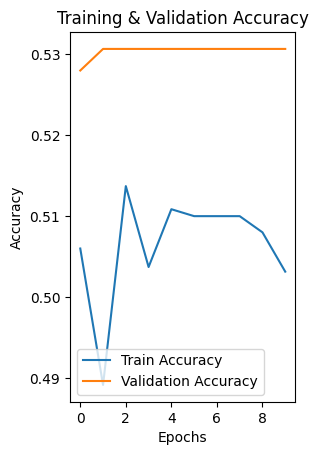

In [11]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")


Text(0.5, 1.0, 'Training & Validation Loss')

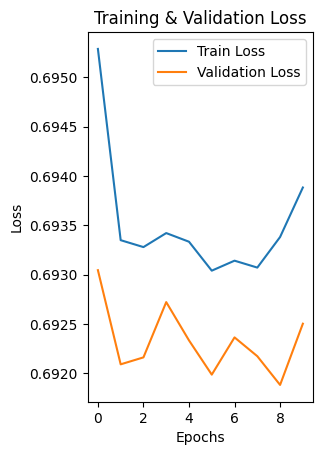

In [12]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")


In [13]:
plt.show()

In [14]:
# 8️⃣ Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5273 - loss: 0.6924
Test Accuracy: 0.5027
